In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df_tcu = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_tcc/jurisprudencias_tcu.csv')
df_stj = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_tcc/jurisprudencias_stj.csv')

In [ ]:
df_tcu.info()

print('\n')

df_tcu.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     371 non-null    int64 
 1   AREA           371 non-null    object
 2   TEMA           371 non-null    object
 3   SUBTEMA        371 non-null    object
 4   ENUNCIADO      371 non-null    object
 5   PROCESSO       371 non-null    object
 6   ANO            371 non-null    object
 7   TIPO_PROCESSO  371 non-null    object
 8   RELATOR        371 non-null    object
 9   VOTO           371 non-null    object
dtypes: int64(1), object(9)
memory usage: 29.1+ KB




,Unnamed: 0,AREA,TEMA,SUBTEMA,ENUNCIADO,PROCESSO,ANO,TIPO_PROCESSO,RELATOR,VOTO
0,0,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,031.777/2010-4,2010,Tomada de Contas Especial,Augusto Nardes,\n TRIBUNAL DE CONTAS DA...
1,1,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,007.653/2009-2,2009,Tomada de Contas Especial,Vital do Rêgo,\n TRIBUNAL DE CONTAS DA...
2,2,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,029.768/2010-1,2010,Tomada de Contas Especial,José Mucio Monteiro,\n TRIBUNAL DE CONTAS DA...
3,3,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,009.607/2011-0,2011,Tomada de Contas Especial,Walton Alencar Rodrigues,\n TRIBUNAL DE CONTAS DA...
4,4,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,006.901/2013-1,2013,Tomada de Contas Especial,André de Carvalho,\n TRIBUNAL DE CONTAS DA...


In [ ]:
df_stj.info()

print('\n')

df_stj.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7407 entries, 0 to 7406
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       7407 non-null   int64 
 1   MATERIA          7407 non-null   object
 2   NATUREZA         7407 non-null   object
 3   TEMA             7407 non-null   object
 4   PROCESSO         7407 non-null   object
 5   RELATOR          7407 non-null   object
 6   ORGAO            7407 non-null   object
 7   DATA_JULGAMENTO  7407 non-null   object
 8   DATA_PUBLICACAO  7407 non-null   object
 9   EMENTA           7407 non-null   object
dtypes: int64(1), object(9)
memory usage: 578.8+ KB




,Unnamed: 0,MATERIA,NATUREZA,TEMA,PROCESSO,RELATOR,ORGAO,DATA_JULGAMENTO,DATA_PUBLICACAO,EMENTA
0,0,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,AgRg no AREsp 331607 / SP\nAGRAVO REGIMENTAL N...,Relator(a)\nMinistro HERMAN BENJAMIN (1132),T2 - SEGUNDA TURMA,15/08/2013,16/09/2013,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...
1,1,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,RMS 31995 / RS\nRECURSO ORDINÁRIO EM MANDADO D...,Relator(a)\nMinistro SÉRGIO KUKINA (1155),T1 - PRIMEIRA TURMA,15/08/2013,26/08/2013,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. ORD...
2,2,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,RMS 32169 / RN\nRECURSO ORDINÁRIO EM MANDADO D...,Relator(a)\nMinistro HUMBERTO MARTINS (1130),T2 - SEGUNDA TURMA,02/05/2013,17/06/2013,PROCESSUAL CIVIL E ADMINISTRATIVO. MANDADO DE ...
3,3,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,AgRg no REsp 1256653 / SP\nAGRAVO REGIMENTAL N...,Relator(a)\nMinistro BENEDITO GONÇALVES (1142),T1 - PRIMEIRA TURMA,28/08/2012,05/09/2012,PROCESSUAL CIVIL E ADMINISTRATIVO. AGRAVO REGI...
4,4,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,MS 15313 / DF\nMANDADO DE SEGURANÇA\n2010/0092...,Relator(a)\nMinistro MAURO CAMPBELL MARQUES (1...,S1 - PRIMEIRA SEÇÃO,09/11/2011,18/11/2011,ADMINISTRATIVO. MANDADO DE SEGURANÇA. SERVIDOR...


In [ ]:
numero_materias = df_stj['MATERIA'].nunique()
print(f"Numero de materias diferentes: {numero_materias}")

materias = df_stj['MATERIA'].unique()
print(f"\nLista de materias:\n{materias}")

Numero de materias diferentes: 7

Lista de materias:
['DIREITO ADMINISTRATIVO' 'DIREITO AMBIENTAL' 'DIREITO CIVIL'
 'DIREITO DA CRIANÇA E DO ADOLESCENTE' 'DIREITO DO CONSUMIDOR'
 'DIREITO EMPRESARIAL' 'DIREITO PENAL']


In [ ]:
materia_counts_stj = df_stj['MATERIA'].value_counts()
print("STJ - Numero de linhas por materia:\n", materia_counts_stj)

STJ - Numero de linhas por materia:
 MATERIA
DIREITO ADMINISTRATIVO                 2542
DIREITO CIVIL                          2108
DIREITO PENAL                          1631
DIREITO DO CONSUMIDOR                   459
DIREITO EMPRESARIAL                     417
DIREITO DA CRIANÇA E DO ADOLESCENTE     188
DIREITO AMBIENTAL                        62
Name: count, dtype: int64


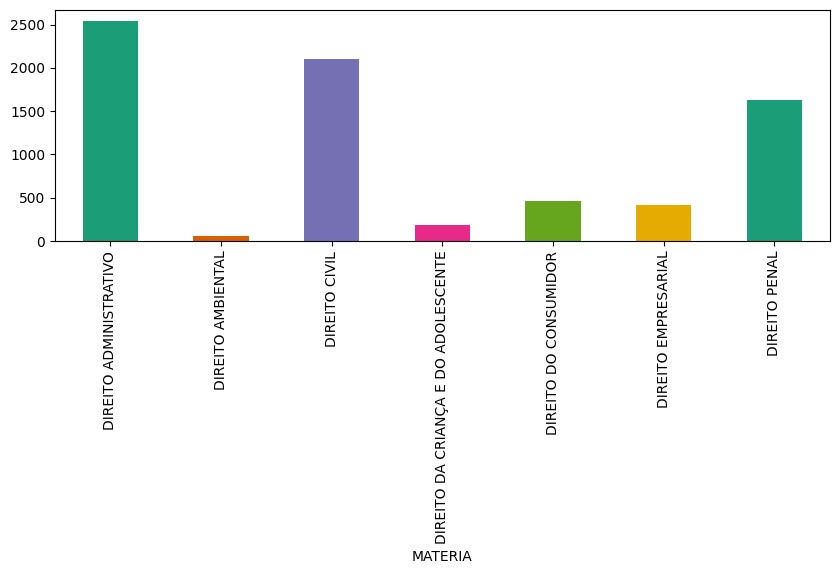

In [ ]:
df_stj.groupby('MATERIA').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'), figsize=(10, 3))
plt.gca().spines[['top', 'right',]]
plt.xticks(rotation=90)
plt.show()

In [ ]:
numero_areas = df_tcu['AREA'].nunique()
print(f"Numero de areas diferentes: {numero_materias}")

materias = df_tcu['AREA'].unique()
print(f"\nLista de áreas:\n{materias}")

Numero de areas diferentes: 7

Lista de áreas:
['Responsabilidade' 'Licitação' 'Direito Processual' 'Pessoal']


In [ ]:
area_counts_tcu = df_tcu['AREA'].value_counts()
print("TCU - Numero de linhas por área:\n", area_counts_tcu)

TCU - Numero de linhas por área:
 AREA
Licitação             194
Pessoal               123
Responsabilidade       36
Direito Processual     18
Name: count, dtype: int64


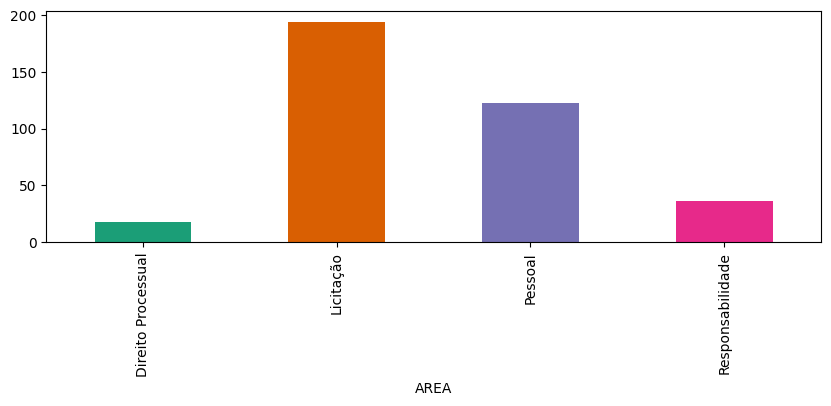

In [ ]:
df_tcu.groupby('AREA').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'), figsize=(10, 3))
plt.gca().spines[['top', 'right',]]
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_tcu_reduzido = df_tcu[['AREA', 'VOTO']]
df_stj_reduzido = df_stj[['MATERIA', 'EMENTA']]

In [ ]:
df_tcu_train, df_tcu_resto = train_test_split(df_tcu_reduzido, test_size=0.3, random_state=42)

# Divide o restante em validação (15%) e teste (15%)
df_tcu_teste, df_tcu_validacao = train_test_split(df_tcu_resto, test_size=0.5, random_state=42)



df_tcu_teste['AREA'].value_counts()

,count
AREA,
Licitação,27
Pessoal,19
Responsabilidade,6
Direito Processual,4


In [ ]:
df_tcu_train['AREA'].value_counts()

,count
AREA,
Licitação,142
Pessoal,83
Responsabilidade,22
Direito Processual,12


In [ ]:
df_tcu_validacao['AREA'].value_counts()

,count
AREA,
Licitação,25
Pessoal,21
Responsabilidade,8
Direito Processual,2


In [ ]:
df_stj_train, df_stj_resto = train_test_split(df_stj_reduzido, test_size=0.3, random_state=42)

# Divide o restante em validação (15%) e teste (15%)
df_stj_teste, df_stj_validacao = train_test_split(df_stj_resto, test_size=0.5, random_state=42)



df_stj_train['MATERIA'].value_counts()

,count
MATERIA,
DIREITO ADMINISTRATIVO,1753
DIREITO CIVIL,1499
DIREITO PENAL,1144
DIREITO DO CONSUMIDOR,327
DIREITO EMPRESARIAL,278
DIREITO DA CRIANÇA E DO ADOLESCENTE,139
DIREITO AMBIENTAL,44


In [ ]:
df_stj_validacao['MATERIA'].value_counts()

,count
MATERIA,
DIREITO ADMINISTRATIVO,386
DIREITO CIVIL,301
DIREITO PENAL,252
DIREITO EMPRESARIAL,73
DIREITO DO CONSUMIDOR,71
DIREITO DA CRIANÇA E DO ADOLESCENTE,25
DIREITO AMBIENTAL,4


In [ ]:
df_stj_teste['MATERIA'].value_counts()

,count
MATERIA,
DIREITO ADMINISTRATIVO,403
DIREITO CIVIL,308
DIREITO PENAL,235
DIREITO EMPRESARIAL,66
DIREITO DO CONSUMIDOR,61
DIREITO DA CRIANÇA E DO ADOLESCENTE,24
DIREITO AMBIENTAL,14


In [ ]:
df_tcu_train_zsl = df_tcu_train[df_tcu_train['AREA'] != 'Direito Processual']

df_tcu_train_dir_proc = df_tcu_train[df_tcu_train['AREA'] == 'Direito Processual']
df_tcu_train_um_dir_proc = df_tcu_train_dir_proc.sample(n=1, random_state=42)
df_tcu_train_fsl_1_shot = pd.concat([df_tcu_train_um_dir_proc, df_tcu_train_zsl])

df_tcu_train_cinco_dir_proc = df_tcu_train_dir_proc.sample(n=5, random_state=42)
df_tcu_train_fsl_5_shot = pd.concat([df_tcu_train_cinco_dir_proc, df_tcu_train_zsl])

df_tcu_train_dez_dir_proc = df_tcu_train_dir_proc.sample(n=10, random_state=42)
df_tcu_train_fsl_10_shot = pd.concat([df_tcu_train_dez_dir_proc, df_tcu_train_zsl])

In [ ]:
sampled_df_tcu_1_shot_puro = df_tcu_train.groupby('AREA').apply(lambda x: x.sample(n=1, random_state=42)).reset_index(drop=True)
sampled_df_stj_1_shot_puro = df_stj_train.groupby('MATERIA').apply(lambda x: x.sample(n=1, random_state=42)).reset_index(drop=True)

sampled_df_tcu_5_shot_puro = df_tcu_train.groupby('AREA').apply(lambda x: x.sample(n=5, random_state=42)).reset_index(drop=True)
sampled_df_stj_5_shot_puro = df_stj_train.groupby('MATERIA').apply(lambda x: x.sample(n=5, random_state=42)).reset_index(drop=True)

sampled_df_tcu_1_shot_puro.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_train_fsl_1_shot_PURO.csv', index=False)

sampled_df_stj_1_shot_puro.to_csv('/content/drive/MyDrive/Colab Notebooks/df_stj_train_fsl_1_shot_PURO.csv', index=False)

sampled_df_tcu_5_shot_puro.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_train_fsl_5_shot_PURO.csv', index=False)

sampled_df_stj_5_shot_puro.to_csv('/content/drive/MyDrive/Colab Notebooks/df_stj_train_fsl_5_shot_PURO.csv', index=False)

<ipython-input-10-c95b5973d59b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df_tcu_1_shot_puro = df_tcu_train.groupby('AREA').apply(lambda x: x.sample(n=1, random_state=42)).reset_index(drop=True)
<ipython-input-10-c95b5973d59b>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df_stj_1_shot_puro = df_stj_train.groupby('MATERIA').apply(lambda x: x.sample(n=1, random_state=42)).reset_inde

In [ ]:
df_stj_train_zsl = df_stj_train[df_stj_train['MATERIA'] != 'DIREITO AMBIENTAL']

df_stj_train_dir_amb = df_stj_train[df_stj_train['MATERIA'] == 'DIREITO AMBIENTAL']
df_stj_train_um_dir_amb = df_stj_train_dir_amb.sample(n=1, random_state=42)
df_stj_train_fsl_1_shot = pd.concat([df_stj_train_um_dir_amb, df_stj_train_zsl])

df_stj_train_cinco_dir_amb = df_stj_train_dir_amb.sample(n=5, random_state=42)
df_stj_train_fsl_5_shot = pd.concat([df_stj_train_cinco_dir_amb, df_stj_train_zsl])

df_stj_train_dez_dir_amb = df_stj_train_dir_amb.sample(n=10, random_state=42)

In [ ]:
df_stj_train_zsl.to_csv('/content/drive/MyDrive/Colab Notebooks/df_stj_train_zsl.csv', index=False)
df_stj_train_fsl_1_shot.to_csv('/content/drive/MyDrive/Colab Notebooks/df_stj_train_fsl_1_shot.csv', index=False)
df_stj_train_fsl_5_shot.to_csv('/content/drive/MyDrive/Colab Notebooks/df_stj_train_fsl_5_shot.csv', index=False)

In [ ]:
df_tcu_train_zsl.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_train_zsl.csv', index=False)
df_tcu_train_fsl_1_shot.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_train_fsl_1_shot.csv', index=False)
df_tcu_train_fsl_5_shot.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_train_fsl_5_shot.csv', index=False)

In [ ]:
df_stj_teste.to_csv('/content/drive/MyDrive/Colab Notebooks/df_stj_teste.csv', index=False)
df_tcu_teste.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_teste.csv', index=False)

df_stj_validacao_zsl = df_stj_validacao[df_stj_validacao['MATERIA'] != 'DIREITO AMBIENTAL']
df_tcu_validacao_zsl = df_tcu_validacao[df_tcu_validacao['AREA'] != 'Direito Processual']

df_stj_validacao_zsl.to_csv('/content/drive/MyDrive/Colab Notebooks/df_stj_validacao_zsl.csv', index=False)
df_tcu_validacao_zsl.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_validacao_zsl.csv', index=False)
df_stj_validacao.to_csv('/content/drive/MyDrive/Colab Notebooks/df_stj_validacao.csv', index=False)
df_tcu_validacao.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_validacao.csv', index=False)

In [ ]:
df_tcu_train_zsl.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_train_zsl.csv', index=False)

In [ ]:
df_tcu_train.to_csv('/content/drive/MyDrive/Colab Notebooks/df_tcu_train.csv', index=False)
df_stj_train.to_csv('/content/drive/MyDrive/Colab Notebooks/df_stj_train.csv', index=False)

In [ ]:
!pip install transformers

from transformers import AutoTokenizer

# Carrega o tokenizer
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')

def count_tokens(text):
  return len(tokenizer.encode(text))

# Aplica a função a cada célula da coluna 'VOTO'
df_tcu_reduzido['token_count'] = df_tcu_reduzido['VOTO'].apply(count_tokens)

# Exibe o DataFrame com a nova coluna
df_tcu_reduzido

<ipython-input-34-07a89b2aa928>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcu_reduzido['token_count'] = df_tcu_reduzido['VOTO'].apply(count_tokens)


,AREA,VOTO,token_count
0,Responsabilidade,\n TRIBUNAL DE CONTAS DA...,1264
1,Responsabilidade,\n TRIBUNAL DE CONTAS DA...,1515
2,Responsabilidade,\n TRIBUNAL DE CONTAS DA...,3062
3,Responsabilidade,\n TRIBUNAL DE CONTAS DA...,5369
4,Responsabilidade,\n TRIBUNAL DE CONTAS DA...,1132
...,...,...,...
366,Pessoal,Trata-se de Consulta formulada pelo Exmo. Sr. ...,2639
367,Pessoal,Cuidam os autos de Incidente de Uniformização ...,17898
368,Pessoal,Examina-se nesta etapa processual o Recurso de...,8551
369,Pessoal,Trata-se dos Recursos de Reconsideração interp...,16744


In [ ]:
# Calcula os valores mínimos, máximos e a média da coluna 'token_count'
min_tokens_ = df_tcu_reduzido['token_count'].min()
max_tokens_ = df_tcu_reduzido['token_count'].max()
mean_tokens_ = df_tcu_reduzido['token_count'].mean()

print(f"Mínimo de tokens: {min_tokens_}")
print(f"Máximo de tokens: {max_tokens_}")
print(f"Média de tokens: {mean_tokens_}")

print(f"Total de linhas do dataset: {len(df_tcu_reduzido)}")

num_above_512 = df_tcu_reduzido[df_tcu_reduzido['token_count'] > 512].shape[0]
print(f"\nNumber of texts with more than 512 tokens: {num_above_512}")

Mínimo de tokens: 34
Máximo de tokens: 143566
Média de tokens: 13662.269541778976
Total de linhas do dataset: 371

Number of texts with more than 512 tokens: 369


In [ ]:
# Aplica a função a cada célula da coluna 'VOTO'
df_stj_reduzido['token_count'] = df_stj_reduzido['EMENTA'].apply(count_tokens)

# Exibe o DataFrame com a nova coluna
df_stj_reduzido

# Calcula os valores mínimos, máximos e a média da coluna 'token_count'
min_tokens__2 = df_stj_reduzido['token_count'].min()
max_tokens__2 = df_stj_reduzido['token_count'].max()
mean_tokens__2 = df_stj_reduzido['token_count'].mean()

print(f"Mínimo de tokens: {min_tokens__2}")
print(f"Máximo de tokens: {max_tokens__2}")
print(f"Média de tokens: {mean_tokens__2}")

Mínimo de tokens: 15
Máximo de tokens: 5018
Média de tokens: 507.7286350749291


<ipython-input-23-bfd004e6436c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stj_reduzido['token_count'] = df_stj_reduzido['EMENTA'].apply(count_tokens)


In [ ]:
print(f"Total de linhas do dataset: {len(df_stj_reduzido)}")

num_above_512 = df_stj_reduzido[df_stj_reduzido['token_count'] > 512].shape[0]
print(f"\nNumber of texts with more than 512 tokens: {num_above_512}")

Total de linhas do dataset: 7407

Number of texts with more than 512 tokens: 2610
